In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# 3a. Hiển thị cách đánh index của dữ liệu
df.index

RangeIndex(start=0, stop=303, step=1)

In [4]:
# 3b. Danh sách các cột input
columns_eda = df.columns[:-1]
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

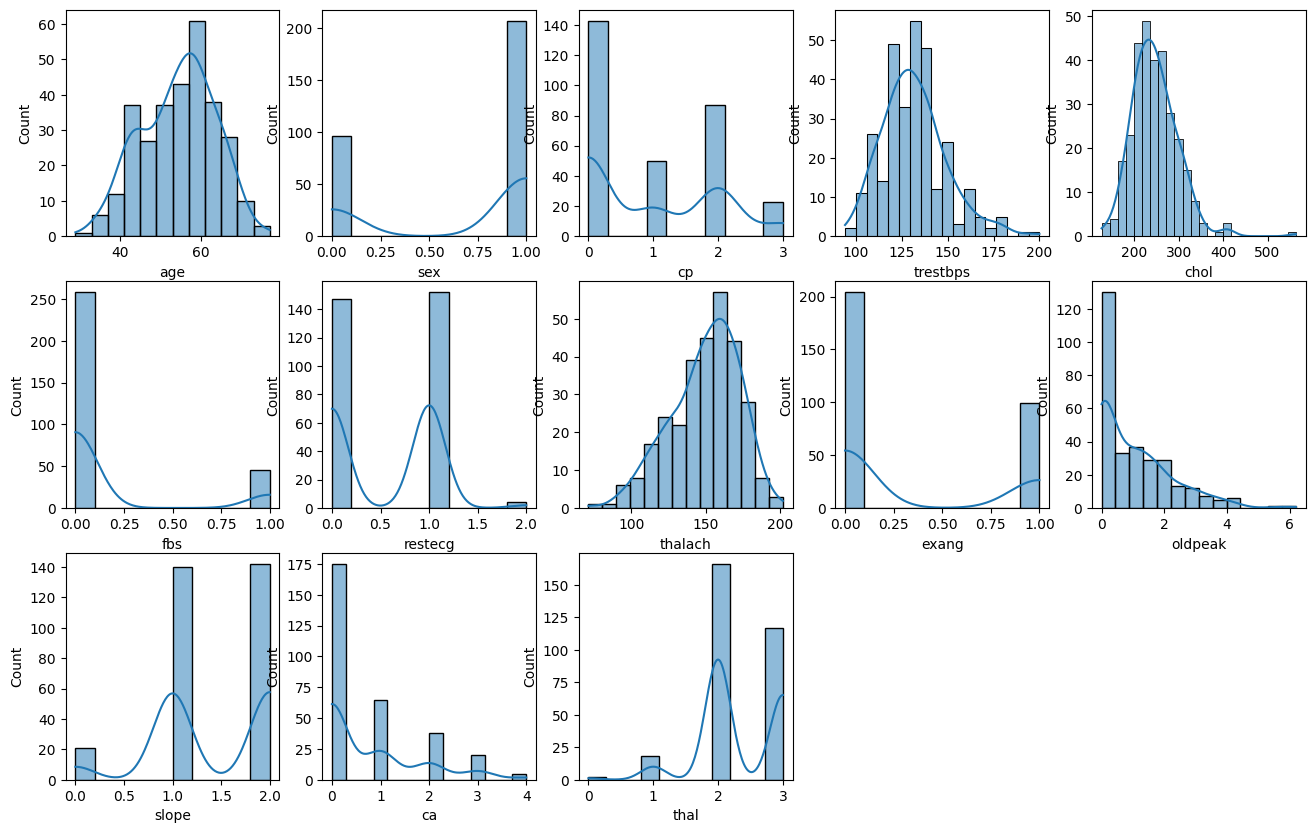

In [5]:
# 3c. Phân tích phân phối các biến số hồi qui
fig = plt.figure(figsize=(16,10))

for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub = fig.add_subplot(3,5,i+1)
    sns.histplot(data=df, x=colname, kde=True)

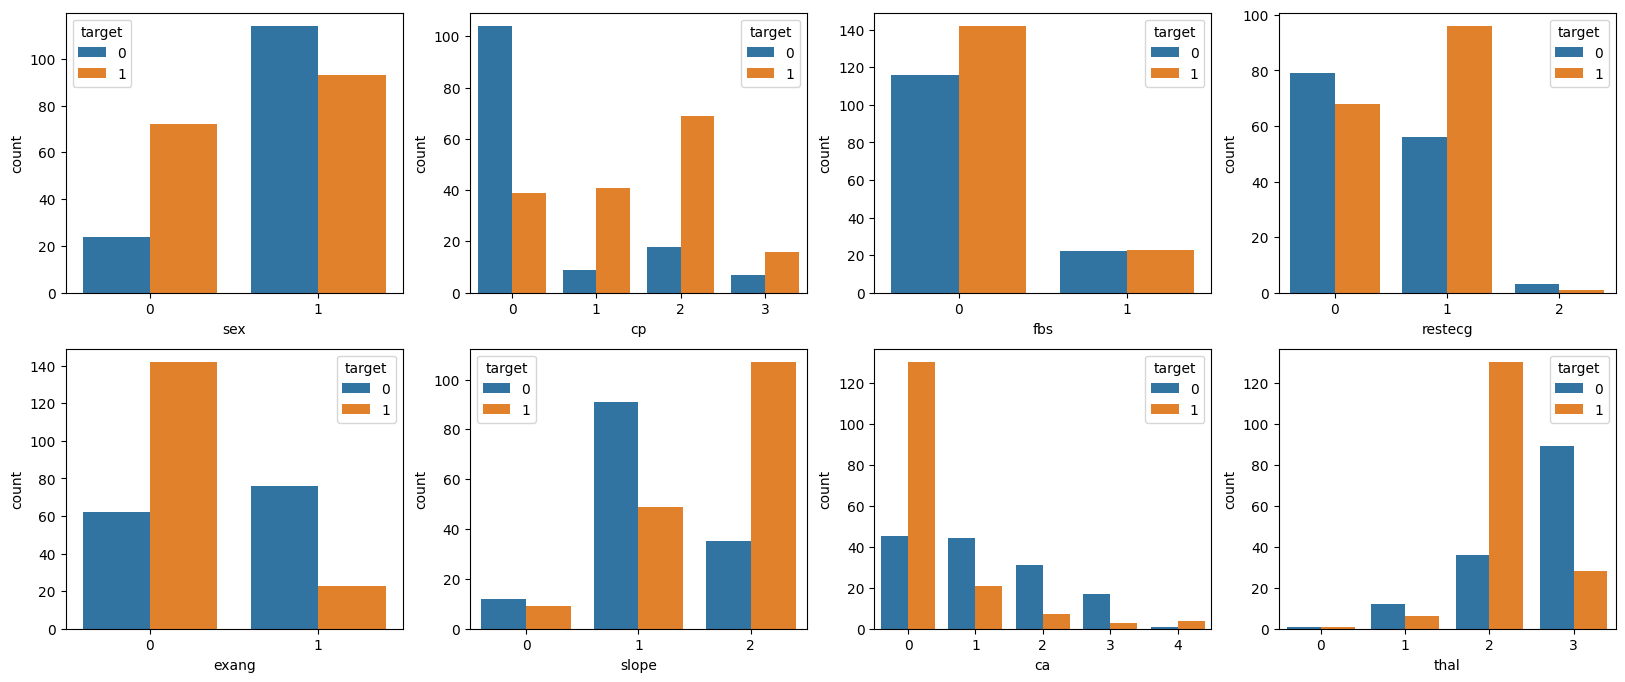

In [6]:
# 3d. Đếm xem số lượng các biến input (nhóm định tính) theo biến mục tiêu
categories_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(20,8))

for i in range(len(categories_list)):
    colname = categories_list[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.countplot(data=df, x=colname, hue="target")

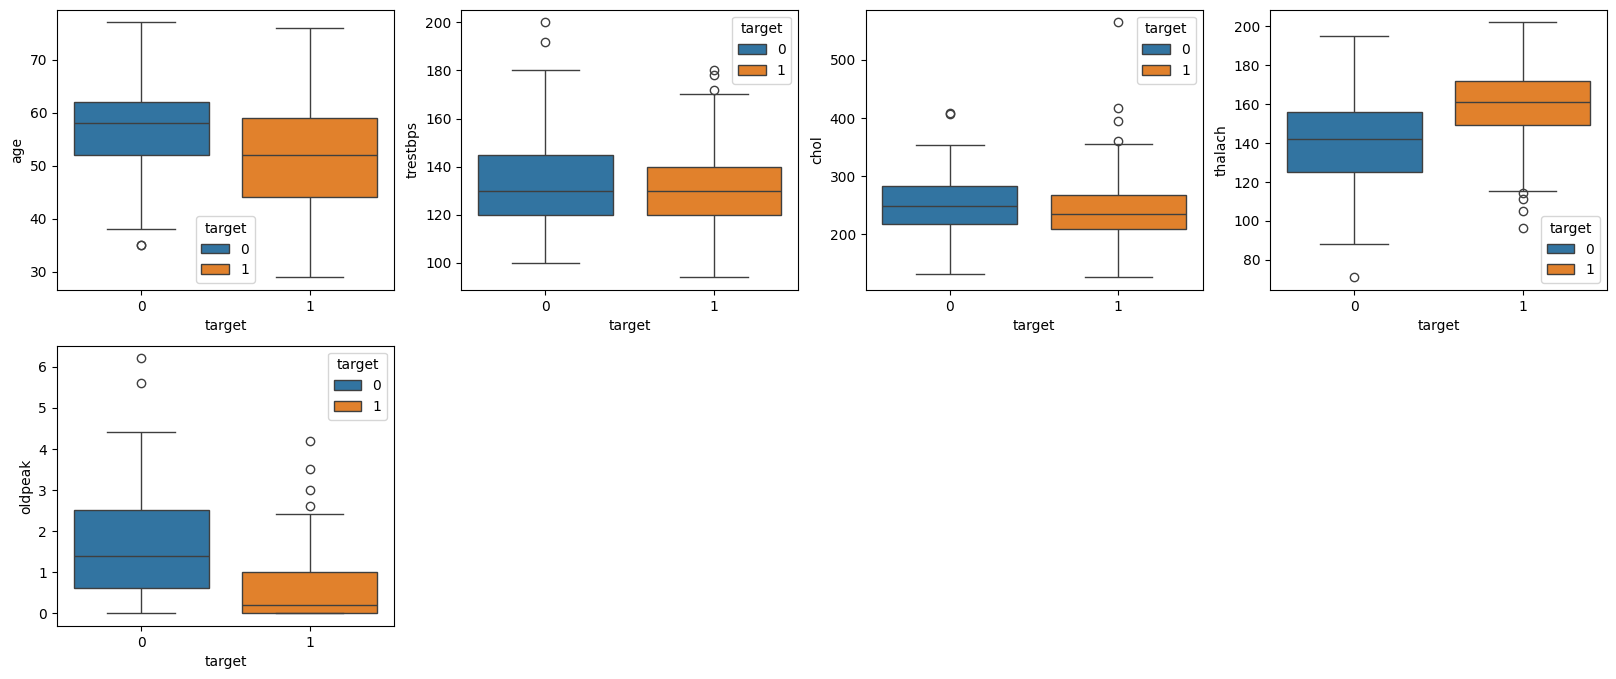

In [7]:
# 3e. Phân tích biếu đồ Box-plot các biến input (nhóm định lượng) theo biến mục tiêu
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20,8))

for i in range(len(numeric_list)):
    colname = numeric_list[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.boxplot(data=df, y=colname, x="target", hue="target")

In [8]:
# 4. Xây dựng mô hình
# a. Chuẩn bị dữ liệu
X = df.iloc[:,:-1].values
Y = df[["target"]].values
X = X.astype(float)
Y = Y.astype(float)


In [9]:
# b. Phân chia dữ liệu thành 2 phần train và test tỉ lệ 80:20 và hệ số random là 42
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test, X_train_indices, X_test_indices = train_test_split(X,Y,df.index, test_size=0.2, random_state=42)

In [10]:
# c. Hiển thị danh sách index của các sample trong tập X_train, X_test
X_train_indices
X_test_indices

Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45, 175,
       118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283, 254,  73,
       231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,  57,  92,  77,
       137, 116,   7, 251, 281,  78, 292, 232, 219, 255,  63,  82, 236, 204,
       249, 104, 300, 193, 184],
      dtype='int64')

In [11]:
# d. Huấn luyện mô hình
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm="ball_tree")

knn.fit(X_train, Y_train)

c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [12]:
# e. Đánh giá mô hình trên tập test bằng độ đo accuracy
# Dự báo mô hình trên tập X_test
y_test_predicted = knn.predict(X_test)
y_test_predicted

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_test_predicted)

#đoán đúng được 69%


0.6885245901639344

In [13]:
knn.score(X_test,Y_test)

0.6885245901639344

c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

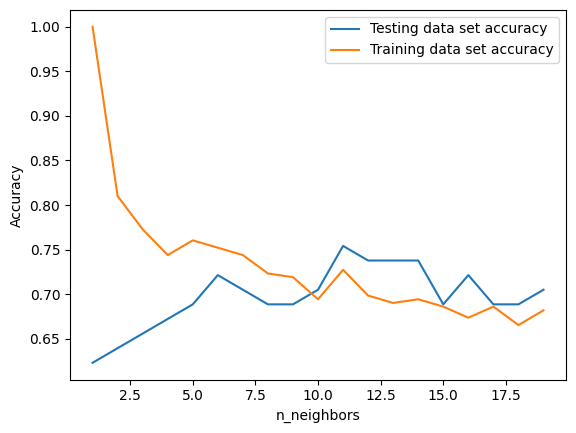

In [14]:
# f. Sử dụng độ đo đánh giá accuracy trên tập train và test để so sánh và lựa chọn K bao nhiêu là 
# tốt nhất cho mô hình K-NN. Sinh viên nhìn biểu đồ để trả lời

import numpy as np
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)

    #compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

#Genarate plot
plt.plot(neighbors, test_accuracy, label="Testing data set accuracy")
plt.plot(neighbors, train_accuracy, label="Training data set accuracy")

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [15]:
#Nhìn vào biểu đồ thấy được K tốt nhất bằng 11
# 5. Xây dựng lại biểu đồ 
knn = KNeighborsClassifier(n_neighbors=11, algorithm="ball_tree")

knn.fit(X_train, Y_train)

knn.score(X_test,Y_test)

c:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7540983606557377

In [16]:
# 6. In ra danh sách khoảng cách và các hàng xóm từ mẫu dữ liệu trong tập test từ mô hình ở câu 5
distances, indices = knn.kneighbors(X_test)


In [17]:
# 7.Cho biết sample input đầu tiên trong tập test sẽ lần lượt gần K (hàng xóm) dòng nào trong
# tập train tính theo index và khoảng cách tương đương theo độ đo Euclidean là bao nhiêu?

# Thông tin cho mẫu đầu tiên trong tập test
first_sample_distances = distances[0]  # Khoảng cách của hàng xóm của mẫu đầu tiên
first_sample_indices = indices[0]  # Chỉ số của hàng xóm của mẫu đầu tiên

# In ra thông tin chi tiết
print("Sample input đầu tiên trong tập test gần nhất với các hàng xóm sau (theo index trong tập train):")
for i, (dist, idx) in enumerate(zip(first_sample_distances, first_sample_indices)):
    print(f"Hàng xóm thứ {i+1}:")
    print(f"  Index trong tập train: {idx}")
    print(f"  Khoảng cách (Euclidean): {dist}")

Sample input đầu tiên trong tập test gần nhất với các hàng xóm sau (theo index trong tập train):
Hàng xóm thứ 1:
  Index trong tập train: 1
  Khoảng cách (Euclidean): 6.636264009214823
Hàng xóm thứ 2:
  Index trong tập train: 79
  Khoảng cách (Euclidean): 17.939063520708096
Hàng xóm thứ 3:
  Index trong tập train: 161
  Khoảng cách (Euclidean): 18.228823330100052
Hàng xóm thứ 4:
  Index trong tập train: 222
  Khoảng cách (Euclidean): 23.23122898169617
Hàng xóm thứ 5:
  Index trong tập train: 211
  Khoảng cách (Euclidean): 24.27673783686762
Hàng xóm thứ 6:
  Index trong tập train: 25
  Khoảng cách (Euclidean): 27.238942710758803
Hàng xóm thứ 7:
  Index trong tập train: 217
  Khoảng cách (Euclidean): 28.294169010592977
Hàng xóm thứ 8:
  Index trong tập train: 166
  Khoảng cách (Euclidean): 28.815967795651076
Hàng xóm thứ 9:
  Index trong tập train: 103
  Khoảng cách (Euclidean): 31.746495869623153
Hàng xóm thứ 10:
  Index trong tập train: 111
  Khoảng cách (Euclidean): 32.21241996497624


In [18]:
# 8. Cho biết với một sample input tương ứng ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
# 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] = [47,0,0,150,250,0,1,140,1,0.5,1,0,2] thì sẽ
#  gần K hàng xóm nào trong tập huấn luyện, với tương ứng lần lượt khoảng cách là bao nhiêu
#  và cho biết giá trị Age của hàng xóm gần nhất

sample_input = [[47,0,0,150,250,0,1,140,1,0.5,1,0,2]]

distances, indices = knn.kneighbors(sample_input)

for i, (dist, idx) in enumerate(zip(distances[0], indices[0])):
    print(f'Hàng xóm thứ {i+1}')
    print(f'    Index trong tập train: {idx}')
    print(f'    Khoảng cách: {dist}')
    
    age = X_train[idx][0]
    print(f'    Giá trị Age: {age}')



Hàng xóm thứ 1
    Index trong tập train: 168
    Khoảng cách: 16.132265804901678
    Giá trị Age: 61.0
Hàng xóm thứ 2
    Index trong tập train: 2
    Khoảng cách: 20.65453945262397
    Giá trị Age: 46.0
Hàng xóm thứ 3
    Index trong tập train: 180
    Khoảng cách: 21.383404780343096
    Giá trị Age: 47.0
Hàng xóm thứ 4
    Index trong tập train: 11
    Khoảng cách: 21.396495040076072
    Giá trị Age: 62.0
Hàng xóm thứ 5
    Index trong tập train: 94
    Khoảng cách: 22.1153792642134
    Giá trị Age: 45.0
Hàng xóm thứ 6
    Index trong tập train: 62
    Khoảng cách: 23.021946051539604
    Giá trị Age: 56.0
Hàng xóm thứ 7
    Index trong tập train: 172
    Khoảng cách: 23.095670589961227
    Giá trị Age: 60.0
Hàng xóm thứ 8
    Index trong tập train: 213
    Khoảng cách: 23.2379000772445
    Giá trị Age: 51.0
Hàng xóm thứ 9
    Index trong tập train: 67
    Khoảng cách: 23.89748940788551
    Giá trị Age: 57.0
Hàng xóm thứ 10
    Index trong tập train: 66
    Khoảng cách: 24.4705945984

In [19]:
# 9. Xem danh sách các giá trị của lớp đánh nhãn của biến output (target) nhằm xác định bệnh
# nhân có bệnh hay không

labels = knn.classes_
labels

array([0., 1.])

In [20]:
# 10. Xem danh sách xác suất tiền dự báo của các mẫu dữ liệu tập test theo các nhãn đầu ra

y_test_predicted = knn.predict_proba(X_test)
y_test_predicted


array([[1.        , 0.        ],
       [0.45454545, 0.54545455],
       [0.45454545, 0.54545455],
       [0.45454545, 0.54545455],
       [0.63636364, 0.36363636],
       [0.18181818, 0.81818182],
       [0.36363636, 0.63636364],
       [0.63636364, 0.36363636],
       [0.72727273, 0.27272727],
       [0.27272727, 0.72727273],
       [0.63636364, 0.36363636],
       [0.45454545, 0.54545455],
       [0.18181818, 0.81818182],
       [0.54545455, 0.45454545],
       [0.18181818, 0.81818182],
       [0.18181818, 0.81818182],
       [0.18181818, 0.81818182],
       [0.54545455, 0.45454545],
       [0.72727273, 0.27272727],
       [0.54545455, 0.45454545],
       [0.45454545, 0.54545455],
       [0.81818182, 0.18181818],
       [0.72727273, 0.27272727],
       [0.36363636, 0.63636364],
       [0.45454545, 0.54545455],
       [0.27272727, 0.72727273],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [0.63636364, 0.36363636],
       [0.36363636, 0.63636364],
       [0.

In [21]:
# 11. Cho biết mẫu input thứ hai trong tập test khi qua mô hình dự báo sẽ cho xác xuất dự báo
# nhãn nào cao hơn và giá trị là bao nhiêu, còn nhãn thấp là nhãn nào có xác suất bao nhiêu

y_test_predicted[1]

# Dựa vào classes_, ta thấy được nhãn 1 cao hơn với 0.55 và nhãn 0 thấp hơn với 0.45

array([0.45454545, 0.54545455])

In [22]:
# 12. Liệt kê danh sách các nhãn dự báo thông qua mô hình của các mẫu dữ liệu input trong tập
# test. Hãy cho biết kết quả dự báo của mẫu input thứ 5 trong tập test sẽ được dự báo là bao
# nhiêu?

y_test_predicted = knn.predict(X_test)
y_test_predicted[4]

#Kết quả input của mẫu dự báo thứ 5 là 0

np.float64(0.0)

In [27]:
# 13. Hãy cho biết nếu điều chỉnh ngưỡng xác suất (threshold) đưa ra quyết định là 0.65 thì kết
# quả dự báo của mẫu input số hai và mẫu số năm và mẫu số sáu là bao nhiêu

y_pred_test_65 = (knn.predict_proba(X_test)[:,1] >= 0.65).astype(float)

y_pred_test_65


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])

In [29]:
# 14. Hãy đánh giá mô hình trên tập test qua Confussion – Matrix

from sklearn.metrics import confusion_matrix
cfmx = confusion_matrix(Y_test, y_test_predicted)
cfmx


array([[20,  9],
       [ 6, 26]])

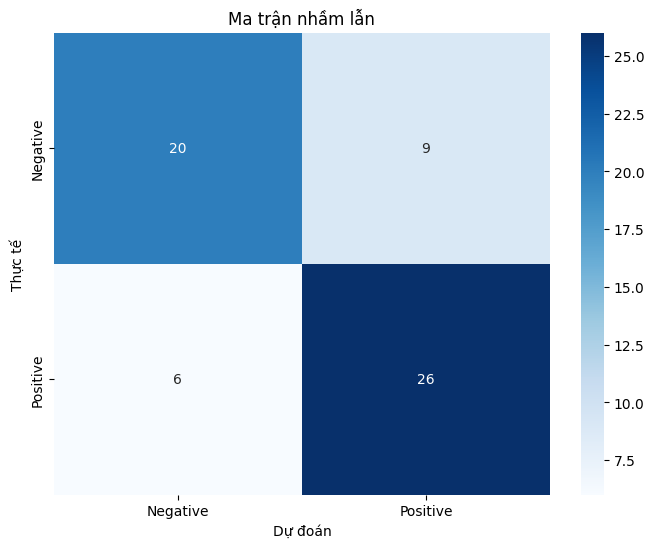

In [30]:
# Đánh giá
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cfmx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn')
plt.show()

# Ta thấy được mô hình đã đánh giá đúng 20 mẫu 0 và 26 mẫu 1

In [ ]:
# 15. Dựa vào confusion matrix, hãy cho biết giá trị quan trọng nhất trong bài toán dự báo này.

# Giá trị quan trọng nhất trong bài toán dự báo này là 6 hoặc 9 - false negative do bài toán liên quan
#đến tim, nếu tim có vấn đề nhưng lại dự đoán không có thì nguy hiểm


In [ ]:
# 16. Hãy đánh giá mô hình thông qua các giá trị Precision, Recall và F1 tổng quát. Trong bài
# toán dự báo này thì đại lượng nào quan trọng.

# Precision: Mô hình có độ chính xác cao với nhãn 0 là 77% và nhãn 1 là 74%
# Recall: Mô hình có khả năng phát hiện tốt với nhãn 0 là 69% và nhãn 1 là 81%
# F1-score: Mô hình có hiệu suất tốt trong việc phát hiện các trường hợp 1 với 78%

In [32]:
# 17. Hãy in ra bảng báo cáo các đại lượng đánh giá theo từng nhóm giá trị nhãn đầu ra

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73        29
         1.0       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



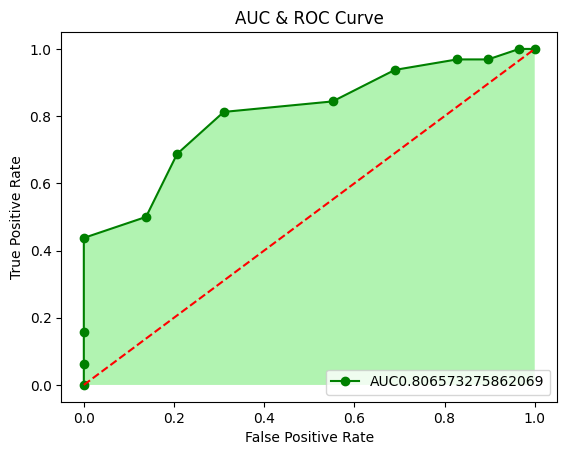

In [34]:
# 18. Đánh giá mô hình thông qua đồ thị AUC & ROC

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

plt.plot(fpr, tpr, 'go-', label="AUC"+str(auc))
plt.plot([0,1],[0,1],"r--")
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()

# Ta thấy đường cong xấp xỉ 0,8 cho thấy model dự đoán rất tốt

In [45]:
# 19. Hãy in ra màn hình accuracy, confusion matrix, [tn, fp, fn, tp], [TPR, FNR, FPR, TNR],
# [precision, recal, F1] và đồ thị AUC & ROC với ngưỡng xác xuất phân lớp là 0.65. Đưa ra
# kết luận khi thiết lập threshold tăng hoặc threshold giảm sẽ tác động như thế nào đến kết
# quả đánh giá mô hình

print(f'Accuray: {accuracy_score(Y_test, y_pred_test_65)}')
print(f'Confusion matrix: {confusion_matrix(Y_test, y_pred_test_65)}')

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test_65).ravel()
print(f'True Negatives (TN): {tn}, False Positives (FP): {fp}, False Negatives (FN): {fn}, True Positives (TP): {tp}')

# Tính TPR, FNR, FPR, TNR
TPR = tp / (tp + fn)  # True Positive Rate
FNR = fn / (tp + fn)  # False Negative Rate
FPR = fp / (fp + tn)  # False Positive Rate
TNR = tn / (tn + fp)  # True Negative Rate

print(f'TPR: {TPR}, FNR: {FNR}, FPR: {FPR}, TNR: {TNR}')

print(classification_report(Y_test, y_pred_test_65))

print(f'AUC: {y_pred_test_65}')

# Từ mô hình AUC & ROC ở câu 18, ta đánh giá được với ngưỡng xác suất là 0.65:
# -threshold tăng: model dự đoán sẽ tốt hơn
# -threshold giảm: model dự đón sẽ kém hơn



Accuray: 0.6721311475409836
Confusion matrix: [[25  4]
 [16 16]]
True Negatives (TN): 25, False Positives (FP): 4, False Negatives (FN): 16, True Positives (TP): 16
TPR: 0.5, FNR: 0.5, FPR: 0.13793103448275862, TNR: 0.8620689655172413
              precision    recall  f1-score   support

         0.0       0.61      0.86      0.71        29
         1.0       0.80      0.50      0.62        32

    accuracy                           0.67        61
   macro avg       0.70      0.68      0.66        61
weighted avg       0.71      0.67      0.66        61

AUC: [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


In [49]:
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [50]:
# 20. Viết chương trình dự báo bệnh tim dưới dạng Console Application, cho phép người dùng
# nhập các đặc trưng đầu vào (feature input) và ngưỡng xác suất (threshold, nếu không nhập
# ngưỡng thì mặc định ngưỡng là 0.5). Sau đó, in ra kết quả chẩn đoán bệnh tim

#Lưu mô hình huấn luyện
import pickle
pickle.dump(knn, open('model_KNN_Heart.sav', 'wb'))

#Load model từ storage
loaded_model = pickle.load(open('model_KNN_Heart.sav', 'rb'))

v=[]
for col_name in columns_eda:
    value = float(input(f'Nhập {col_name}: '))
    v.append(value)

y_pred = loaded_model.predict([v])
print('Kết quả dự báo bệnh tim: '+ str(y_pred[0]))

Kết quả dự báo bệnh tim: 0.0
